# Modelo de Regresión lineal utilizando descenso de gradiente construido con métodos numéricos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import time

Construcción del modelo mediante métodos numéricos, sin librerías

In [2]:
# Cargar el dataset de diabetes disponible en los datasets de sklearn
diabetes_X_all, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Se utiliza el feature 2, que corresponde a bmi
diabetes_X = np.reshape(diabetes_X_all[:, 2], (-1, 1))

# Dividir los datos en conjuntos de prueba y entrenamiento
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Dividir las etiquetas en conjuntos de prueba y entrenamiento
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Normalizar los datos (feature scaling)
mean_X_train = np.mean(diabetes_X_train)
std_X_train = np.std(diabetes_X_train)
diabetes_X_train_normalized = (diabetes_X_train - mean_X_train) / std_X_train
diabetes_X_test_normalized = (diabetes_X_test - mean_X_train) / std_X_train

Construcción del descenso de gradientede forma numérica

In [3]:
# Función de costo
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [4]:
# Cálculo del Gradiente
def numerical_gradient(X, y, theta, epsilon=1e-5):
    gradients = np.zeros(len(theta))
    for i in range(len(theta)):
        theta_plus = theta.copy()
        theta_plus[i] += epsilon
        theta_minus = theta.copy()
        theta_minus[i] -= epsilon
        cost_plus = compute_cost(X, y, theta_plus)
        cost_minus = compute_cost(X, y, theta_minus)
        gradients[i] = (cost_plus - cost_minus) / (2 * epsilon)
    return gradients

In [5]:
# Algoritmo de descenso de gradiente
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        gradients = numerical_gradient(X, y, theta)
        theta -= learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

In [6]:
# Añadir columna de 1`s para el término de intercepción
diabetes_X_train_normalized = np.column_stack((np.ones(len(diabetes_X_train_normalized)), diabetes_X_train_normalized))
diabetes_X_test_normalized = np.column_stack((np.ones(len(diabetes_X_test_normalized)), diabetes_X_test_normalized))

Entrenamiento del modelo

In [7]:
# Inicializar parámetros e hiperparámetros
theta = np.zeros(2)
learning_rate = 0.01
num_iterations = 1000

# Entrenar el modelo
theta, cost_history = gradient_descent(diabetes_X_train_normalized, diabetes_y_train, theta, learning_rate, num_iterations)

# Hacer predicciones mediante el conjunto de prueba
diabetes_y_pred = diabetes_X_test_normalized.dot(theta)

# Coeficientes del modelo
print("Coeficientes: \n", "theta_1 = ", theta[1], " theta_0  = ", theta[0])

Coeficientes: 
 theta_1 =  44.647288432202004  theta_0  =  153.35593838881323


Evaluación del modelo

In [8]:
# Cálculo del error cuadrático medio
mse = np.mean((diabetes_y_pred - diabetes_y_test) ** 2)
print("Error cuadrático medio (MSE Cost): %.2f" % mse)

# Cálculo del coeficiente de determinación (r-squared)
ssr = np.sum((diabetes_y_pred - np.mean(diabetes_y_test)) ** 2)
sst = np.sum((diabetes_y_test - np.mean(diabetes_y_test)) ** 2)
r_squared = 1 - (ssr / sst)
print("Coeficiente de determinación (R-squared): %.2f" % r_squared)

Error cuadrático medio (MSE Cost): 2547.89
Coeficiente de determinación (R-squared): 0.55


Gráfico del modelo

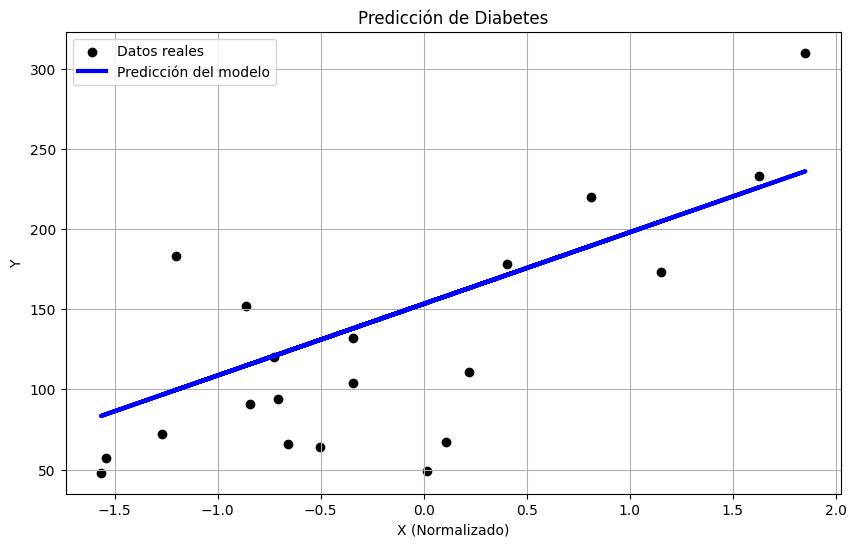

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(diabetes_X_test_normalized[:, 1], diabetes_y_test, color="black", label="Datos reales")
plt.plot(diabetes_X_test_normalized[:, 1], diabetes_y_pred, color="blue", linewidth=3, label="Predicción del modelo")
plt.xlabel("X (Normalizado)")
plt.ylabel("Y")
plt.title("Predicción de Diabetes")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [10]:
# Tiempo de ejecución promedio del modelo propio
times = []
sum = 0
for i in range(1000):
    start_time = time.time()
    theta, cost_history = gradient_descent(diabetes_X_train_normalized, diabetes_y_train, theta, learning_rate, num_iterations)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

for j in range(1000):
    sum += times[j]
average_time1 = sum / 1000
print(f"Tiempo de ejecución método construido: {average_time1} segundos")

Tiempo de ejecución método construido: 0.08255790495872498 segundos


# Modelo construido utilizando Sklearn

In [11]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Instanciar el objeto de regresión lineal de sklearn
regr = linear_model.LinearRegression()

# Normalizar los datos (feature scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(diabetes_X_train)
diabetes_X_train_normalized = scaler.transform(diabetes_X_train)

# Entrenar el modelo mediante el conjunto de entrenamiento
regr.fit(diabetes_X_train_normalized, diabetes_y_train)

# Hacer predicciones mediante el conjunto de prueba
diabetes_X_test_normalized = scaler.transform(diabetes_X_test)
diabetes_y_pred = regr.predict(diabetes_X_test_normalized)

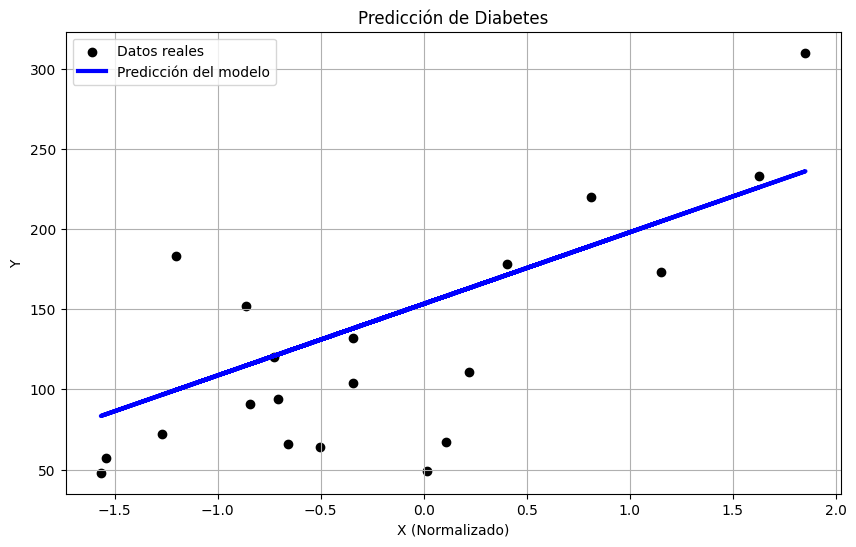

In [13]:
# Gráfico del modelo de sklearn
plt.figure(figsize=(10, 6))

plt.scatter(diabetes_X_test_normalized, diabetes_y_test, color="black", label="Datos reales")
plt.plot(diabetes_X_test_normalized, diabetes_y_pred, color="blue", linewidth=3, label="Predicción del modelo")

plt.xlabel("X (Normalizado)")
plt.ylabel("Y")
plt.title("Predicción de Diabetes")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

Comparación de los resultados de los modelos

In [14]:
# Modelo construido
print("Coeficientes del método construido")
print(f"theta_1 = {theta[1]:.8f}, theta_0 = {theta[0]:.8f}")
print(f"Error cuadrático medio (MSE Cost): {mse:.2f}")
print(f"Coeficiente de determinación (R-squared): {r_squared:.2f}")

# Modelo de sklearn
print("\nCoeficientes del modelo Sklearn:")
print(f"theta_1 = {regr.coef_[0]:.8f}, theta_0 = {regr.intercept_:.8f}")
print(f"Error cuadrático medio (MSE Cost): {mean_squared_error(diabetes_y_test, diabetes_y_pred):.2f}")
print(f"Coeficiente de determinación: {r2_score(diabetes_y_test, diabetes_y_pred):.2f}")

Coeficientes del método construido
theta_1 = 44.64921598, theta_0 = 153.36255922
Error cuadrático medio (MSE Cost): 2547.89
Coeficiente de determinación (R-squared): 0.55

Coeficientes del modelo Sklearn:
theta_1 = 44.64921599, theta_0 = 153.36255924
Error cuadrático medio (MSE Cost): 2548.07
Coeficiente de determinación: 0.47


Comparación de los tiempos de ejecución

In [15]:
# Tiempo de ejecución promedio del modelo construido con sklearn 
times = []
sum = 0
for i in range(1000):
    start_time = time.time()
    regr.fit(diabetes_X_train_normalized, diabetes_y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

for j in range(1000):
    sum += times[j]
average_time2 = sum / 1000
print(f"Tiempo de ejecución método construido: {average_time1} segundos")
print(f"Tiempo de ejecución modelo sklearn:    {average_time2} segundos")

Tiempo de ejecución método construido: 0.08255790495872498 segundos
Tiempo de ejecución modelo sklearn:    0.0004041438102722168 segundos
